# **Universidad ICESI**

*Milton Orlando Sarria Paja*

---
### 📌 **Extensión al Modelo de Regresión Lineal Múltiple**


La **regresión lineal múltiple** es una extensión de la regresión lineal simple que permite modelar la relación entre una variable dependiente $ y $ y múltiples variables independientes $ x_1, x_2, \dots, x_n $.
Este modelo es ampliamente utilizado en estadística y aprendizaje automático para predecir valores numéricos y analizar la relación entre múltiples variables.
En el modelo de regresión lineal múltiple, la relación se extiende a múltiples variables independientes. Matemáticamente, el modelo se expresa como:


$ h(\mathbf{x}) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_n \cdot x_n $

donde:
- $ h(\mathbf{x}) $: valor estimado de la variable dependiente.
- $ \theta_0 $: intercepto.
- $ \theta_1, \theta_2, \ldots, \theta_n $: coeficientes de las variables independientes $ x_1, x_2, \ldots, x_n $.

Los supuestos mencionados anteriormente se mantienen en el modelo múltiple, con la consideración adicional de que no debe existir multicolinealidad perfecta entre las variables independientes, es decir, las variables explicativas no deben estar perfectamente correlacionadas entre sí.

En notación matricial, la ecuación se puede reescribir como:  

$
 \mathbf{y} = h(\mathbf{x}) = \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\varepsilon}
$

donde:  
- $ \mathbf{y} $ es un vector columna de dimensión $ m \times 1 $ con las observaciones de la variable dependiente,  
- $ \mathbf{X} $ es una matriz de dimensión $ m \times (n+1)$) que contiene las observaciones de las variables independientes, donde la primera columna es un vector de unos para incluir el término $ \theta_0 $,  
- $ \boldsymbol{\theta} $ es un vector de dimensión $ (n+1) \times 1 $ que agrupa los parámetros del modelo,  
- $ \boldsymbol{\varepsilon} $ es un vector de errores de dimensión $ m \times 1 $.  

El objetivo del modelo es encontrar los valores de $ \boldsymbol{\theta} $ que minimicen la función de costo, generalmente definida como el **error cuadrático medio (MSE)**:

$
J(\boldsymbol{\theta}) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\boldsymbol{\theta}}(x^{(i)}) - y^{(i)})^2
$


Para minimizar $ J(\boldsymbol{\theta}) $, se suelen emplear métodos como la **inversa de la matriz normal** (cuando $ \mathbf{X}^T\mathbf{X} $ es invertible) o algoritmos iterativos como el **descenso de gradiente**.  






In [1]:
#librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns

#### **Multicolinealidad en Regresión Lineal Múltiple**

Generamos datos donde dos variables independientes están altamente correlacionadas:

In [2]:
m = 100
x = np.linspace(0, 10, m)  # m puntos equidistantes entre 0 y 10
# Generación de datos con multicolinealidad
x2 = x + np.random.normal(0, 0.01, m)  # Alta correlación con x
y_multi = 2 + 3 * x + 1.5 * x2 + np.random.normal(0, 1, m)

# Creación del DataFrame
data_multi = pd.DataFrame({'x1': x, 'x2': x2, 'y': y_multi})

# Ajuste del modelo múltiple
X_multi = sm.add_constant(data_multi[['x1', 'x2']])  # Agrega el intercepto
model_multi = sm.OLS(data_multi['y'], X_multi).fit()

# Resumen del modelo
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8687.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):          4.04e-110
Time:                        14:03:41   Log-Likelihood:                -141.10
No. Observations:                 100   AIC:                             288.2
Df Residuals:                      97   BIC:                             296.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8584      0.200      9.275      0.0

In [3]:
# Matriz de correlación
corr_matrix = data_multi[['x1', 'x2']].corr()
print("Matriz de correlación:")
print(corr_matrix)

Matriz de correlación:
          x1        x2
x1  1.000000  0.999995
x2  0.999995  1.000000


#### **Interpretación**:
1. **Coeficientes no significativos**:
   - Aunque las variables son predictoras importantes, la multicolinealidad reduce la precisión de las estimaciones de los coeficientes.
2. **Matriz de correlación**:
   - Si la correlación entre las variables independientes es cercana a ±1, existe multicolinealidad.

---
- Cumplir los supuestos del modelo de regresión lineal es fundamental para obtener resultados válidos y fiables.
- Al utilizar Python y bibliotecas como `statsmodels`, es posible diagnosticar y analizar el cumplimiento de estos supuestos.
- Cuando los supuestos no se cumplen, es necesario aplicar transformaciones, usar métodos robustos o modelos alternativos, como la regresión robusta o modelos no lineales. Estos modelos están fuera del alcance de este curso.


In [4]:
# DataFrame de ejemplo
data = {
    "X1": [10, 20, 30, 40, 50],
    "X2": [5, 10, 15, 20, 25],
    "X3": [2, 4, 6, 8, 10],
    "Y": [15, 25, 35, 45, 55]
}
df = pd.DataFrame(data)
# Definir variables predictoras (X) y la variable objetivo (Y)
X = df[["X1", "X2", "X3"]]  # Variables predictoras
y = df["Y"]  # Variable objetivo

In [5]:
# Agregar término de sesgo para regresión lineal
X_mul = sm.add_constant(X)
# Ajustar modelo de regresión lineal con statsmodels
mul_model = sm.OLS(y, X_mul).fit()


----
📖 **Caso 1: Análisis del impacto de la inversión publicitaria en TV, radio y periódicos sobre las ventas de un producto en diferentes mercados.**

📂 **Datos:** : `Advertising.csv`

Estos datos expresan las ventas en función del tipo de publicidad y el monto del gasto.  
El conjunto de datos contiene 200 filas con 3 características $[TV, Radio, Periódico]$ y una variable objetivo $[Ventas]$.

### **Variables:**

- **TV:** dinero gastado en publicidad en televisión para un solo producto en un mercado determinado (en miles de dólares).  
- **Radio:** dinero gastado en publicidad en radio.  
- **Periódico:** dinero gastado en publicidad en periódicos.  

### **¿Cuál es la variable de respuesta?**  

- **Ventas:** ventas de un solo producto en un mercado determinado (en miles de unidades).  

El conjunto de datos contiene **200 observaciones**, lo que significa que hay **200 mercados** (puntos de venta) en el estudio.  

---

### **Preguntas sobre los datos de publicidad**  

Imagina que trabajas para la empresa que fabrica y comercializa este producto. La empresa podría preguntarte lo siguiente:  

👉 **Con base en estos datos, ¿cómo deberíamos invertir nuestro presupuesto de publicidad en el futuro?**  

Esta pregunta general puede llevarnos a preguntas más específicas:  

1. ¿Existe una relación entre la publicidad y las ventas?  
2. ¿Qué tan fuerte es esa relación?  
3. ¿Qué tipos de publicidad contribuyen más a las ventas?  
4. ¿Cuál es el efecto de cada tipo de publicidad en las ventas?  
5. Dado un gasto publicitario en un mercado específico, ¿se pueden predecir las ventas?  

¡Exploraremos estas preguntas a continuación! 🚀

In [7]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
# print the coefficients
lm.params

,0
Intercept,7.032594
TV,0.047537


### **Interpretación de los Coeficientes del Modelo**  

¿Cómo interpretamos el coeficiente de **TV**?  

- Un aumento de **1 unidad** en el gasto en publicidad en TV está asociado con un aumento de **0.047537 unidades** en las ventas.  
- De manera más clara: **gastar $1,000 adicionales en anuncios de TV** está asociado con un aumento en las ventas de **47.537 unidades** del producto.  

📌 **Nota:** Si un aumento en el gasto en TV estuviera asociado con una disminución en las ventas, el coeficiente sería negativo.  


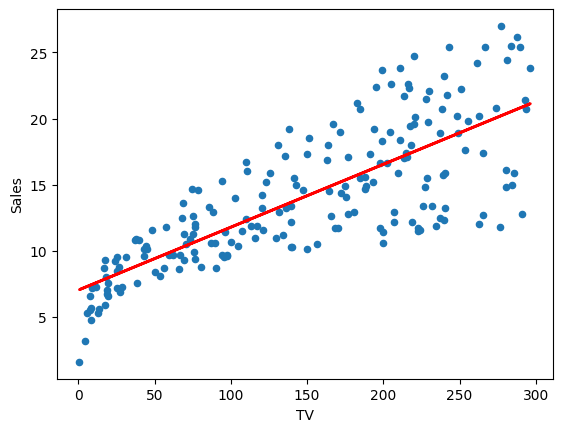

In [11]:
#
import matplotlib.pyplot as plt
from sklearn import metrics
data.plot(kind='scatter', x='TV', y='Sales')
y_hat = lm.predict(data["TV"])
#
plt.plot(data["TV"], y_hat, c='red', linewidth=2)

In [67]:
mse1 = np.mean((data['Sales'] - y_hat) ** 2)
print("Error cuadrático medio (MSE):", mse1)

Error cuadrático medio (MSE): 10.512652915656753


In [68]:
mse_simple = mean_squared_error(data['Sales'] , y_hat)
print(mse_simple)

10.512652915656753



📊 **Ejemplo de predicción:**  

Supongamos que en un nuevo mercado, el gasto en publicidad en TV es de **$50,000**. ¿Cuál sería la predicción de ventas para ese mercado?

In [13]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [14]:
lm.predict(X_new)

,0
0,9.409426


## 👉 **Incorporando al modelo las otras dos variables**  

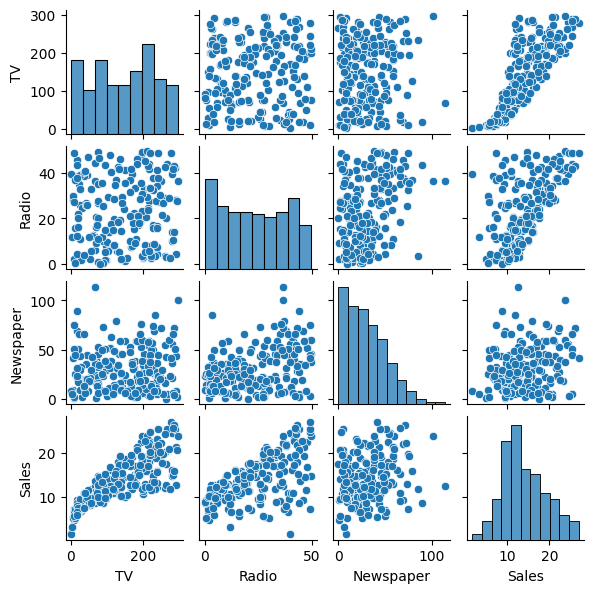

In [15]:
sns.pairplot(data, height=1.5)


<Axes: >

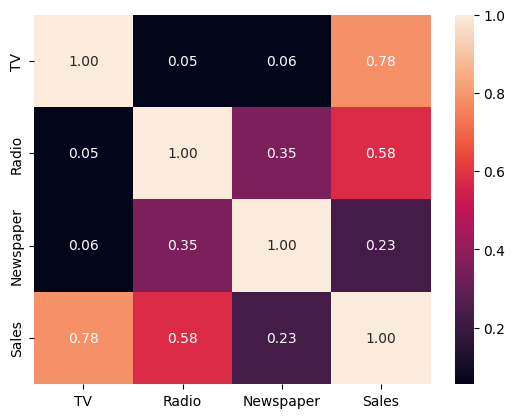

In [16]:
# Calculate correlations
corr = data.corr()
 # Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

In [35]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = data[["TV" ,"Radio", "Newspaper"]]  # Variables predictoras
y = data["Sales"]  # Variable objetivo

In [36]:
### Splitting Dataset ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

In [37]:
# Agregar término de sesgo para regresión lineal
X_train = sm.add_constant(X_train)
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y_train, X_train).fit()
y_pred_train = lin_model.predict(X_train)


In [38]:
X_test = sm.add_constant(X_test)
y_pred_test = lin_model.predict(X_test)


In [39]:
mse_multiple = metrics.mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error:', mse_multiple)

Mean Squared Error: 3.1740973539761037


In [40]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Root Mean Squared Error: 1.78159966153345


### Estimar la relevancia de los coeficientes  

Ahora que tienes los coeficientes, ¿cómo puedes determinar si son relevantes para predecir tu variable objetivo?  

La mejor manera es calcular el **p-valor**. El p-valor se utiliza para cuantificar la **significancia estadística**; permite determinar si se debe rechazar o no la hipótesis nula.  

### ¿Qué es la hipótesis nula?  

En cualquier tarea de modelado, la hipótesis de trabajo supone que existe una correlación entre las variables independientes y la variable objetivo. La **hipótesis nula**, en cambio, establece lo contrario: **no hay correlación** entre las variables independientes y la variable objetivo.  

Por lo tanto, calcular el p-valor para cada coeficiente permite determinar si la variable es estadísticamente significativa para predecir el objetivo. Como regla general, si el **p-valor es menor a 0.05**, existe una relación fuerte entre la variable y la variable objetivo.

In [41]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           2.53e-76
Time:                        14:37:44   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.000       2.281       3.677
TV             0.0447      0.002     28.544      0.000       0.042       0.048
Radio          0.1892      0.010     19.518      0.000       0.170       0.208
Newspaper      0.0028      0.007      0.392      0.696      -0.011       0.017
==============================================================================
Omnibus:                       67.697   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.326
Skew:                          -1.627   Prob(JB):                     6.52e-53
Kurtosis:                       8.046   Cond. No.                         471.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 📌 **Regresión Polinómica**

La **regresión polinómica** es una extensión de la regresión lineal que permite modelar relaciones no lineales entre las variables. En la regresión lineal simple, la relación entre la variable dependiente $ y $ y la variable independiente $ x $ se expresa como:

$
h(x) = \theta_0 + \theta_1 x
$

Sin embargo, en muchos casos, los datos pueden seguir un patrón no lineal. Para capturar esta relación, podemos extender la ecuación a una función polinómica de grado \( n \):

$
h(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \dots + \theta_n x^n
$

Aquí, los coeficientes $ \theta_0, \theta_1, ..., \theta_n $ son los parámetros del modelo que se ajustan mediante el algoritmo de regresión. La regresión polinómica sigue siendo un modelo **lineal en los parámetros**, pero la variable independiente se eleva a diferentes potencias.

### 🔹 **Ejemplo en Python: Comparación entre regresión lineal y polinómica**
- **La regresión lineal** no captura la verdadera forma de los datos.  
------
 😊

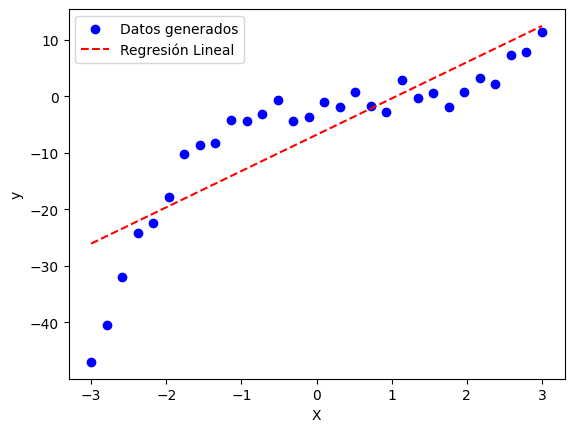

In [59]:
np.random.seed(42)
x = np.linspace(-3, 3, 30).reshape(-1, 1)
y = x**3 - 2*x**2 + x + np.random.randn(30, 1) * 2  # Relación cúbica con ruido

# Agregar término de sesgo para regresión lineal
X_lin = sm.add_constant(x)
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y, X_lin).fit()
y_pred_lin_sm = lin_model.predict(X_lin)

# Datos generados
plt.scatter(x, y, color='blue', label='Datos generados')
# Regresión Lineal (statsmodels)
plt.plot(x, y_pred_lin_sm, color='red', linestyle='--', label='Regresión Lineal')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 🔹 Crear variables polinómicas manualmente (grado 3)

In [58]:
X_poly = np.column_stack((x, x**2, x**3))
X_poly = sm.add_constant(X_poly)  # Agregar término de sesgo
# Ajustar modelo de regresión polinómica con statsmodels
poly_model = sm.OLS(y, X_poly).fit()
y_pred_poly_sm = poly_model.predict(X_poly)


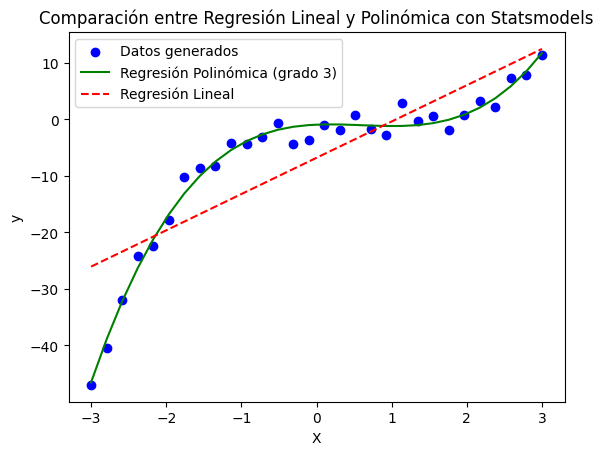

In [57]:
# Datos generados
plt.scatter(x, y, color='blue', label='Datos generados')
# Regresión Polinómica (statsmodels, grado 3)
plt.plot(x, y_pred_poly_sm, color='green', label='Regresión Polinómica (grado 3)')

# Regresión Lineal (statsmodels)
plt.plot(x, y_pred_lin_sm, color='red', linestyle='--', label='Regresión Lineal')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparación entre Regresión Lineal y Polinómica con Statsmodels")
plt.show()


En la gráfica puedes ver la diferencia entre la regresión lineal (línea roja discontinua) y la regresión polinómica (línea verde).  

- **La regresión lineal** no captura la verdadera forma de los datos, ya que asume una relación estrictamente lineal.  
- **La regresión polinómica (grado 3)** logra adaptarse mejor a la tendencia real de los datos, que sigue una relación cúbica.

----
📖 **Caso 1: Análisis del impacto de la inversión publicitaria en TV, radio y periódicos sobre las ventas de un producto en diferentes mercados.**

📂 **Datos:** : `Advertising.csv`


In [45]:

data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [60]:
X_poly = np.column_stack((data["TV"], data["TV"]**2, data["TV"]**3))
X_poly = sm.add_constant(X_poly)  # Agregar término de sesgo
# Ajustar modelo de regresión polinómica con statsmodels
poly_model1 = sm.OLS(data["Sales"], X_poly).fit()
y_pred_poly_sm1 = poly_model1.predict(X_poly)

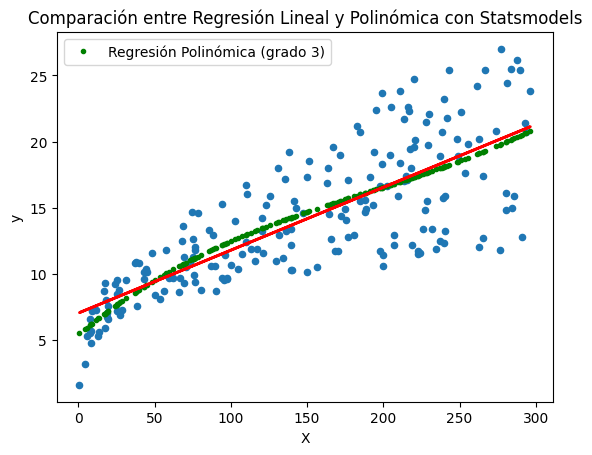

In [61]:
#
data.plot(kind='scatter', x='TV', y='Sales')
# Regresión Polinómica (statsmodels, grado 3)
plt.plot(data["TV"], y_pred_poly_sm1, '.g', label='Regresión Polinómica (grado 3)')

plt.plot(data["TV"], y_hat, c='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparación entre Regresión Lineal y Polinómica con Statsmodels")
plt.show()

In [69]:
mse_poly1 = mean_squared_error(data["Sales"], y_pred_poly_sm1)
print('MSE poly 1:', mse_poly1)
print("MSE simple: ",mse_simple)

MSE poly 1: 10.238365552094633
MSE simple:  10.512652915656753


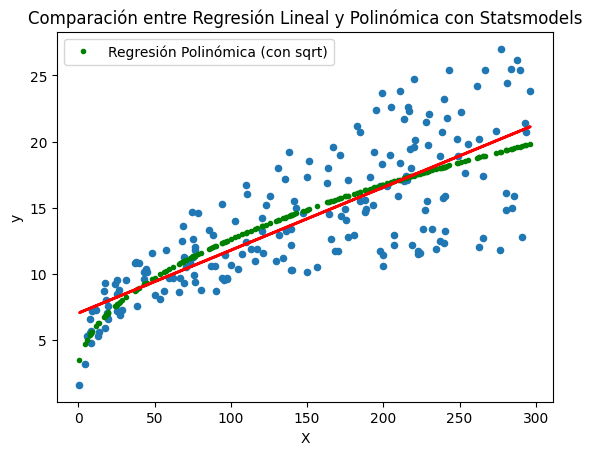

In [70]:
X_poly = sm.add_constant(np.sqrt(data["TV"]))  # Agregar término de sesgo
# Ajustar modelo de regresión polinómica con statsmodels
poly_model2 = sm.OLS(data["Sales"], X_poly).fit()
y_pred_poly_sm2 = poly_model2.predict(X_poly)
#
data.plot(kind='scatter', x='TV', y='Sales')
# Regresión Polinómica (statsmodels, grado 3)
plt.plot(data["TV"], y_pred_poly_sm2, '.g', label='Regresión Polinómica (con sqrt)')
plt.plot(data["TV"], y_hat, c='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparación entre Regresión Lineal y Polinómica con Statsmodels")
plt.show()

In [64]:
mse_poly2 = metrics.mean_squared_error(data["Sales"], y_pred_poly_sm2)
print('MSE poly 1:', mse_poly2)
print("MSE simple: ",mse_simple)


MSE poly 1: 10.214009855565081


NameError: name 'mse_simple' is not defined

In [65]:
X_nl = np.column_stack((data["TV"], np.sqrt(data["TV"]), data["Radio"]))
X_nl = sm.add_constant(X_nl)  # Agregar término de sesgo
# Ajustar modelo de regresión polinómica con statsmodels
poly_model3 = sm.OLS(data["Sales"], X_nl).fit()
y_pred_nl = poly_model3.predict(X_nl)

In [71]:
mse_poly2 = metrics.mean_squared_error(data["Sales"], y_pred_nl)

print('MSE poly 1:', mse_poly2)
print('MSE multiple:', mse_multiple)
print("MSE simple: ",mse_simple)

MSE poly 1: 1.8927574154131157
MSE multiple: 3.1740973539761037
MSE simple:  10.512652915656753


## **Caso 2 (Trabajo Independiente): Temperatura y Ventas de Helado (Relación No Lineal)**

📂 **Dataset:** `Ice_cream_selling_data.csv`  
📊 **Relación esperada:** No lineal  

### **Parte 1: Estimar modelo lineal**
1. Cargar los datos
2. Ajustar una **regresión lineal** usando `statsmodels`. .
3. Visualizar la relación mediante un **gráfico de dispersión**  y  visualizar la linea del modelo  

---

In [72]:
ice_cream_df = pd.read_csv('Ice_cream_selling_data.csv')
display(ice_cream_df.head())

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [73]:
# Define predictor and target variables
X_ice = ice_cream_df[["Temperature (°C)"]]
y_ice = ice_cream_df["Ice Cream Sales (units)"]

# Add a constant to the predictor variable
X_ice = sm.add_constant(X_ice)

# Fit the linear regression model
linear_model_ice = sm.OLS(y_ice, X_ice).fit()

# Print the model summary
print(linear_model_ice.summary())

                               OLS Regression Results                              
Dep. Variable:     Ice Cream Sales (units)   R-squared:                       0.031
Model:                                 OLS   Adj. R-squared:                  0.010
Method:                      Least Squares   F-statistic:                     1.488
Date:                     Sat, 09 Aug 2025   Prob (F-statistic):              0.229
Time:                             15:44:04   Log-Likelihood:                -191.09
No. Observations:                       49   AIC:                             386.2
Df Residuals:                           47   BIC:                             390.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

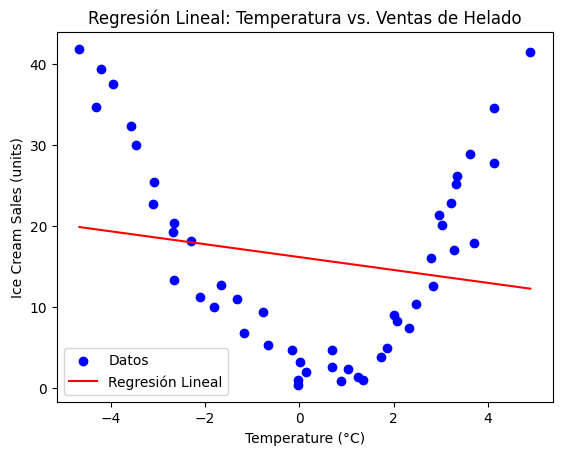

In [75]:
# Visualize the data and the linear regression line
plt.scatter(ice_cream_df["Temperature (°C)"], ice_cream_df["Ice Cream Sales (units)"], color='blue', label='Datos')
plt.plot(ice_cream_df["Temperature (°C)"], linear_model_ice.predict(X_ice), color='red', label='Regresión Lineal')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Regresión Lineal: Temperatura vs. Ventas de Helado")
plt.legend()
plt.show()

### **Parte 2: Estimar modelo lineal usando regresión polinomica**
1. Cargar los datos
2. Ajustar una **regresión lineal** usando `statsmodels` y transformando la variable predictora con una relación polinomica.
3. Comparar desempeño

---

In [76]:
# Create the squared temperature variable
X_ice_poly = pd.DataFrame(ice_cream_df["Temperature (°C)"]**2)
X_ice_poly.columns = ["Temperature_squared"]

# Add a constant to the predictor variable
X_ice_poly = sm.add_constant(X_ice_poly)

# Fit the polynomial regression model (linear regression on the squared term)
poly_model_ice = sm.OLS(y_ice, X_ice_poly).fit()

# Print the model summary
print(poly_model_ice.summary())

                               OLS Regression Results                              
Dep. Variable:     Ice Cream Sales (units)   R-squared:                       0.899
Model:                                 OLS   Adj. R-squared:                  0.897
Method:                      Least Squares   F-statistic:                     419.3
Date:                     Sat, 09 Aug 2025   Prob (F-statistic):           4.63e-25
Time:                             15:45:49   Log-Likelihood:                -135.63
No. Observations:                       49   AIC:                             275.3
Df Residuals:                           47   BIC:                             279.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

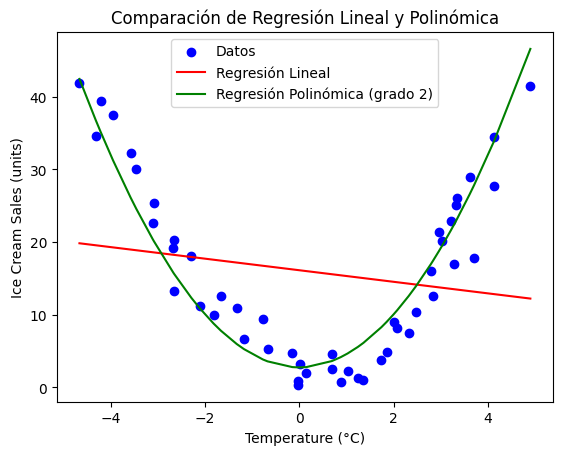

In [77]:
# Visualize the data and both regression lines
plt.scatter(ice_cream_df["Temperature (°C)"], ice_cream_df["Ice Cream Sales (units)"], color='blue', label='Datos')
plt.plot(ice_cream_df["Temperature (°C)"], linear_model_ice.predict(sm.add_constant(ice_cream_df[["Temperature (°C)"]])), color='red', label='Regresión Lineal')
plt.plot(ice_cream_df["Temperature (°C)"], poly_model_ice.predict(sm.add_constant(ice_cream_df["Temperature (°C)"]**2)), color='green', label='Regresión Polinómica (grado 2)')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.title("Comparación de Regresión Lineal y Polinómica")
plt.legend()
plt.show()

In [80]:
print("Linear Model R-squared:", linear_model_ice.rsquared)
print("Polynomial Model (degree 2) R-squared:", poly_model_ice.rsquared)
print("MSE Linear Model:", mse_simple)
print("MSE Polynomial Model (degree 2):", mse_poly2)

Linear Model R-squared: 0.030689536411547258
Polynomial Model (degree 2) R-squared: 0.8992119092148863
MSE Linear Model: 10.512652915656753
MSE Polynomial Model (degree 2): 1.8927574154131157
